In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from yellowbrick.classifier import ClassificationReport, ROCAUC, ConfusionMatrix

In [2]:
data = np.genfromtxt("spambase.data", delimiter=',')
X = data[:,:-1]
Y = data[:,-1]
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=1)

## Training Data

In [ ]:
train_error = []
test_error = []
for d in range(1,21):
    clf = DecisionTreeClassifier(max_depth=d).fit(Xtr,Ytr)
    train_error.append(1 - clf.score(Xtr,Ytr))
    test_error.append(1 - clf.score(Xte,Yte))
    #print(clf.score(Xte,Yte), "\t", 1 - clf.score(Xte,Yte))
    
#clf = DecisionTreeClassifier(max_depth=None).fit(Xtr,Ytr)
#train_error.append(1 - clf.score(Xtr,Ytr))
#test_error.append(1 - clf.score(Xte,Yte))

## Cross Validation

In [ ]:
cv_error = []
kf = KFold(n_splits=5, shuffle=True, random_state=1)
for d in range(1,21):
    err = []
    for train_idx, test_idx in kf.split(X):
        Xtr_cv, Xte_cv = X[train_idx], X[test_idx]
        Ytr_cv, Yte_cv = Y[train_idx], Y[test_idx]
        
        clf = DecisionTreeClassifier(max_depth=d).fit(Xtr_cv,Ytr_cv)
        err.append(1 - clf.score(Xte_cv,Yte_cv))
    cv_error.append(np.mean(err))

In [ ]:
plt.rcParams["figure.figsize"] = (15.0,8.0)
plt.semilogy(range(1,21), train_error, label="training")
plt.semilogy(range(1,21), test_error, label="test")
plt.semilogy(range(1,21), cv_error, label="cross validation")
plt.xticks(range(1,21))
plt.xlabel('Depth')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
res = sorted(enumerate(test_error), key=lambda d:(d[1],d[0]))[0]
print("At feature =", res[0] + 1," test error at lowest:", res[1])
res = sorted(enumerate(cv_error), key=lambda d:(d[1],d[0]))[0]
print("At feature =", res[0] + 1," cross validation error at lowest:", res[1])

## Feature Selection - SelectFromModel

In [ ]:
tree = DecisionTreeClassifier().fit(Xtr,Ytr)
model = SelectFromModel(tree, prefit=True)
X_new = model.transform(X)
print("features:\t",X_new.shape)

Xtr, Xte, Ytr, Yte = train_test_split(X_new, Y, test_size=0.3, shuffle=True, random_state=1)
clf = DecisionTreeClassifier(max_depth=7).fit(Xtr,Ytr)

print("training score:\t", clf.score(Xtr,Ytr))
print("test score:\t", clf.score(Xte,Yte))

In [ ]:
Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=1)
clf = DecisionTreeClassifier(max_depth=7).fit(Xtr,Ytr)
print("training score:\t", clf.score(Xtr,Ytr))
print("test score:\t", clf.score(Xte,Yte))

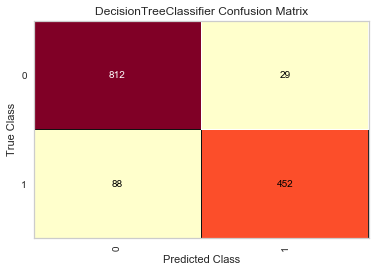

In [3]:
model = DecisionTreeClassifier(max_depth=7)
cm = ConfusionMatrix(model, classes=[0, 1])
cm.fit(Xtr, Ytr)
cm.score(Xte, Yte)
cm.poof()

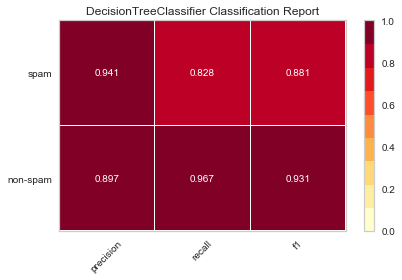

In [4]:
visualizer = ClassificationReport(model, classes=['non-spam', 'spam'])

visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

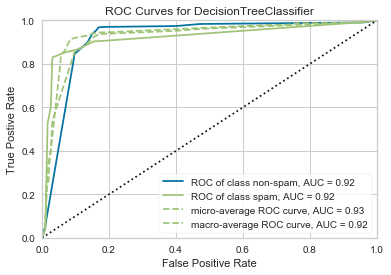

In [5]:
visualizer = ROCAUC(model, classes=['non-spam', 'spam'])
visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

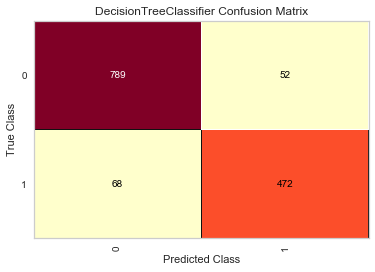

In [6]:
model = DecisionTreeClassifier(max_depth=13)
cm = ConfusionMatrix(model, classes=[0, 1])
cm.fit(Xtr, Ytr)
cm.score(Xte, Yte)
cm.poof()

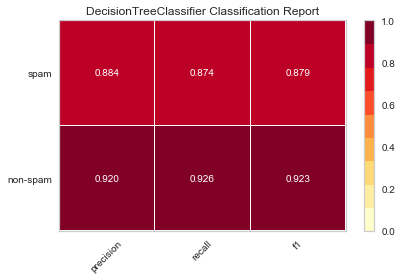

In [7]:
visualizer = ClassificationReport(model, classes=['non-spam', 'spam'])

visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()

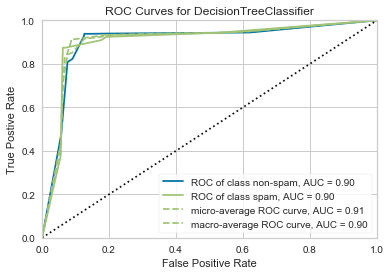

In [8]:
visualizer = ROCAUC(model, classes=['non-spam', 'spam'])
visualizer.fit(Xtr, Ytr)
visualizer.score(Xte, Yte)
visualizer.poof()